<a href="https://colab.research.google.com/github/nastyalolpro/DS-Unit-1-Sprint-2-Statistics/blob/master/Copy_of_LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi^2 Tests

Use the following dataset relating to math scores of students in two different Portugese schools:

<https://archive.ics.uci.edu/ml/datasets/Student+Performance>

### 1) Load the dataset specifically relating to math scores as a new dataframe.

There are two datasets in the `student.zip` file, make sure you use `student-mat.csv`.


In [1]:
import pandas as pd
import numpy as np 
from scipy.stats import ttest_ind, ttest_1samp, chisquare, chi2_contingency
import matplotlib.pyplot as plt

In [2]:
# YOUR WORK HERE
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip


--2020-07-29 01:25:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip’

student.zip         100%[===================>]  20.00K  --.-KB/s    in 0.1s    

2020-07-29 01:25:14 (143 KB/s) - ‘student.zip’ saved [20478/20478]



In [3]:
! unzip student.zip

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [4]:
student_mat = pd.read_csv('student-mat.csv', sep=';')
print(student_mat.shape)
student_mat.sample(5)

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,other,mother,1,3,0,no,yes,yes,no,yes,yes,yes,no,4,3,3,1,2,2,5,18,18,19
21,GP,M,15,U,GT3,T,4,4,health,health,other,father,1,1,0,no,yes,yes,no,yes,yes,yes,no,5,4,2,1,1,5,0,12,15,15
154,GP,F,17,U,GT3,T,4,4,other,teacher,course,mother,1,1,0,yes,yes,no,no,yes,yes,no,yes,4,2,1,1,1,4,0,11,11,12
297,GP,F,18,U,LE3,T,4,3,other,other,home,other,2,2,0,no,yes,yes,no,yes,yes,yes,yes,4,4,5,1,2,2,10,10,8,8
101,GP,M,16,U,GT3,T,4,4,services,teacher,other,father,1,3,0,no,yes,no,yes,yes,yes,yes,yes,4,4,3,1,1,4,0,16,17,17


In [5]:
student_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### 2) Use Chi^2 tests and `stats.chi2_contingency()` to identify:
 - Two pairs of variables that are dependent (are associated with one another).
 - Two pairs of variables that are independent (have no significant relationship).

Does it make intuitive sense why the variables in these pairs might or might not show a relationship to one another? 


In [6]:
# lets first look at age and number of absences 
# to do so we need to convert number of absences into categorical variable

In [7]:
student_mat['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [8]:
cut_points = [-1, 1, 7, 100]
student_mat['absences_cat'] = pd.cut(student_mat['absences'], cut_points, labels=['lo', 'med', 'high'])
student_mat['absences_cat'].value_counts().sort_index()

lo      118
med     169
high    108
Name: absences_cat, dtype: int64

In [9]:
# now lets get rid of outliers 
chi_test_data = student_mat[student_mat['age']<20]
chi_test_data.shape

(390, 34)

In [10]:
ab_age = pd.crosstab(chi_test_data['age'], chi_test_data['absences_cat'], normalize='index')
ab_age

absences_cat,lo,med,high
age,,,
15,0.341463,0.500000,0.158537
16,0.288462,0.451923,0.259615
17,0.255102,0.469388,0.275510
18,0.341463,0.329268,0.329268
19,0.250000,0.250000,0.500000


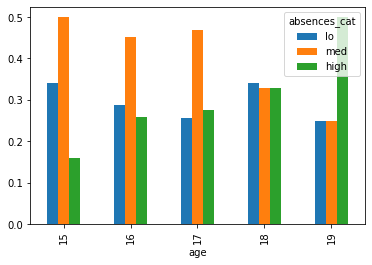

In [11]:
# here we clearly see that the older student gets the more their miss their classes
ab_age.plot(kind='bar');

In [12]:
# lets check that
# null hypo: theres no sig differemce between two, which means they are dependent
# alternetive hypo: theres sig diff between two, which means they are independent
chisquare(ab_age, axis=None)
# pvalue is greater than .5 which means we fail to reject the null hypo

Power_divergenceResult(statistic=0.4489481682311492, pvalue=0.9999999953165539)

In [13]:
# now lets look at sex and final grade (G3)
# first we need to convert final grade into categorical var
student_mat['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [14]:
cut_points_g = [0, 9, 13, 30]
student_mat['G3_cat'] = pd.cut(student_mat['G3'], cut_points_g, labels=['lo', 'med', 'hi'])
student_mat['G3_cat'].value_counts().sort_index()

lo      92
med    165
hi     100
Name: G3_cat, dtype: int64

In [15]:
cr = pd.crosstab(student_mat['sex'],student_mat['G3_cat'])

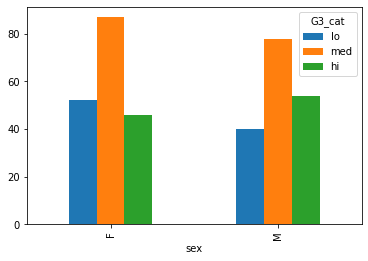

In [16]:
# seems like these two variable are independent
cr.plot(kind='bar');

In [17]:
# why p-values in these two tests differ?
chisquare(cr, axis=None)

Power_divergenceResult(statistic=29.369747899159666, pvalue=1.9618887859380794e-05)

In [18]:
chi2_contingency(cr)

(2.2256884351950075,
 0.3286229554115644,
 2,
 array([[47.67507003, 85.50420168, 51.82072829],
        [44.32492997, 79.49579832, 48.17927171]]))

In [33]:
# lets find one more pair of independent variables 
# for example sex and internet 
cr2 = pd.crosstab(student_mat['sex'],student_mat['internet'])
cr2

internet,no,yes
sex,,
F,38,170
M,28,159


In [20]:
# why p-values in these two tests differ?
chisquare(cr2, axis=None)

Power_divergenceResult(statistic=176.23037974683544, pvalue=5.747558923497128e-38)

In [21]:
chi2_contingency(cr2)

(0.5500617337279294,
 0.45829247086513125,
 1,
 array([[ 34.75443038, 173.24556962],
        [ 31.24556962, 155.75443038]]))

### 3) Use NumPy to perform your own chi^2 test "from scratch" 

Pick any of the chi^2 tests that you ran in part 2 and try them on your own. You should get the same results that Scipy got for all four values returned from `chi2_contingency()`

In [38]:
# 

def my_chi_2 (data1, data2):
  nums = pd.crosstab(data1, data2)
  nums['row total'] = nums.sum()
  
  '''
  chi2 = np.square(mydata1-mydata2)/mydata2.sum()
  p_value = (mydata1.mean()-mydata2.mean())/(mydata1.std()/len(mydata1.sqrt()))
  dof = len(mydata2) - 1
  
  return (chi2, p_value, dof)



In [39]:
my_chi_2(student_mat['sex'],student_mat['internet'])

internet,no,yes,row total
sex,,,
F,38,170,NaN
M,28,159,NaN


## Stretch goals:

### 1. Refactor your code so it is elegant, readable, and holds reusable code in functions.

In [ ]:
# YOUR WORK HEREnums 



### 2. Check For Understanding - Study and write your own explanations/definitions for these topics:

- What is a sample "estimate" in statistics?

- What are hypothesis test? How are they useful?

- What is a "null hypothesis?"

- What is a p-value and what does it represent?

- What does it mean for something to be "statistically significant?"

- What is a test statistic and how does it relate to a p-value?

- What are "degrees of freedom" and how are they calculated in a 1-sample, 2-sample, and chi^2 test for independence?

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)